# A1 - Evaluating binary classifiers


## Introduction
Welcome to the first real, graded assignment for Machine Learning. This assignment's main topic is binary classification, but we also cover some related methodological tools and tricks. The assignment consist of some coding tasks which will be graded with unit tests, as well as a few that will be manually graded, and some text questions. The theory behind these exercises and questions is found in Chapter 2 of the handbook and the lectures.

In the assignment you'll be asked to implement some basic functions. Many of these already exist in `scikit-learn`, but you are supposed to supply your own implementation. Because of this, **you are not supposed to import any libraries/packages beyond the ones imported below.**

## How to submit
Read this notebook and do the exercises. Then, do the following:
* Make sure you have implemented all functions in the correct python cells.
* Restart your kernel and run all cells.
* Check that all functions have been added to `student_studentnumber.py`.
* (optional) push your code to GitHub as a backup 
* **Submit `student_studentnumber.py` and `A1.ipynb` as a zipped folder to Brightspace**
* **Fill in the open questions in ANS**.

* **This is an individual assignment. Your code and report must be your own work.**

### How is it graded?
* 7 exercises, each of which has unit tests. Together worth 50% of the grade.
    
* 12 open questions. Together worth the other 50% of the grade.

## What you'll learn
- Using a hold-out set for evaluation
- Using accuracy measures to evaluate how well a model is working
- Using an ROC curves and Area Under Curve
- Using these tools to compare models, model configurations and class difficulty

In [1]:
# FILL IN YOU STUDENT NUMBER WITHOUT THE IDENTIFIER S
student = 3799271

In [2]:
# This cell imports %%execwritefile command (execu/tes cell and writes it into file). 
# All cells that start with %%execwritefile should be in student_studentnumber.py file after running all cells.
from custommagics import CustomMagics
get_ipython().register_magics(CustomMagics)

In [3]:
%%execwritefile student_{student}.py 0 
# ^ DO NOT CHANGE THIS LINE

# You are not allowed to add additional imports!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, ensemble, metrics, svm, model_selection, linear_model

student_3799271.py is backup to student_3799271_backup.py
Overwriting student_3799271.py


## Holdout Sets
One of the strategies for evaluating how well your model is learning is to use a holdout set. The core idea is to split your dataset into a **training** and a **test** set. You use the training set to train your model. After you're done training (also called "fitting"), you evaluate how well the model is doing with the "held-out" data that you didn't use for the training.

The held-out data is on the one hand, similar to our training data. It came from the same dataset after all. But on the other hand, our model has never seen this particular data before. So it's suitable to use to test how well the model *generalizes*. If the model deals well with the training data but does poorly on the test/held-out data, then our model may have *overfit* on the training data.

You usually can't simply chop off the last 30% or so of your dataset to make the test set. The data might have already been sorted on some criteria. Or maybe it's been put in the dataset in the order it was collected. The result could be that the first part of the data isn't really the same as the last part. So we have to shuffle the data before dividing it between training and test set.

Let's take a look at the function that you'll implement:

In [4]:
def training_test_split(X, y, test_size=0.3, random_state=None):
    """ Split the features X and labels y into training and test features and labels. 
    
    `test_size` indicates the fraction (rounded down) that should go to the test set.
    `random_state` allows to set a random seed to make the split reproducible. 
    """
    # Your code here
    X, y = np.array(X), np.array(y)
    if random_state:
        np.random.seed(random_state)

    sample_n = len(X)
    test_n = int(sample_n * test_size)

    sample_indices = np.arange(sample_n)
    np.random.shuffle(sample_indices)

    sample_indeces = sample_indices[ : test_n]
    test_indeces = sample_indices[ test_n :]

    X_train = X[sample_indices]
    X_test = X[test_indices]
    
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

There are a couple of things to see here.
- We write `X` and `y`, which is a bit unconventional if you recall the PEP8 coding standard that prefers whole-word and lower-case variable names. However, X is a matrix of feature columns and instance rows, while y is a vector of instance labels, and it's customary to write matrices with capitals and vectors with lowercase letters. We also commonly use X and y to refer to them in machine learning. 
    

- We're expecting to enter X and y as some kind of sequence of instances, but from the function signature, we can't tell if we're expecting numpy arrays, pandas DataFrames/Series, or even plain old Python lists. Ideally, all of them work. Also, ideally, the output type will be the same as the input type, so if `X` was a numpy matrix, `X_train` is also a numpy matrix, and if `X` was a pandas DataFrame, `X_train` will also be a DataFrame (and so on). 

    **For this exercise we simplify that** and only deal with numpy arrays.


- Instances in`X` and `y` should remain aligned in the results. For example, if we decide that instance 4 goes into the training set, then both the feature row 4 from `X` and the label entry 4 from `y` should go there. And if we send 1, 7 and 4 into the test set then they should be in that order in both `X_test` and `y_test`.


- The `test_size` parameter allows us to split according to a certain rate. For example, with the default 0.3 value, a set of 10 instances would be split into 7 training and 3 test instances.

- The `random_state` parameter allows us to set a random seed. If you wanted to do a replicable experiment where you split the data the same way every time, you can pass a specific random seed to this parameter to initialize the random number generator. 

  The default value is `None`, because by default we don't want to do this. If we don't pass a value to this parameter, the function should do a truly random split every time.

  The implementation in numpy is not dependent on your OS - if you give it the same random seed, it should give you the same "random" numbers on Windows, Linux or Mac. However, the underlying random number generator may change in future versions of numpy. As always, if *exact* reproducibility is needed, you need to record the versions of all the software you're using. Note that this can be made easier with for example `pip freeze`.

### Exercise 1: Training/Test Split
Implement `training_test_split` yourself, and satisfy yourself that it passes the unit tests.

Hint: look at the documentation for `numpy.random` for how to set the random seed and how to shuffle an array.

In [62]:
%%execwritefile -a -s student_{student}.py 1 
# ^ DO NOT CHANGE THIS LINE

def training_test_split(X, y, test_size=0.3, random_state=None):
    """ Split the features X and labels y into training and test features and labels. 
    
    `split` indicates the fraction (rounded down) that should go to the test set.

    `random_state` allows to set a random seed to make the split reproducible. 
    If `random_state` is None, then no random seed will be set.
    
    """
    X, y = np.array(X), np.array(y)  # evern though the X and y are defined as np now, we still do this for safety
    if random_state:
        np.random.seed(random_state)

    sample_n = len(X)
    test_n = int(sample_n * test_size)

    sample_indices = np.arange(sample_n)
    np.random.shuffle(sample_indices)

    test_indices = sample_indices[:test_n]
    train_indices = sample_indices[test_n:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

Replace existing code student_3799271.py


In [63]:
# A dataset that makes it easy to see if we're splitting X and y in the same way
X = np.arange(30)
X = X.reshape((10, 3), order='F')
print('X =\n', X, '\n')

y = np.arange(10)
print('y =', y)

X =
 [[ 0 10 20]
 [ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]
 [ 5 15 25]
 [ 6 16 26]
 [ 7 17 27]
 [ 8 18 28]
 [ 9 19 29]] 

y = [0 1 2 3 4 5 6 7 8 9]


In [64]:
X_train, X_test, y_train, y_test = training_test_split(X, y, test_size=0.4)  # 40% test set
print('X_train[:,0]'.ljust(15), X_train[:,0])
print('y_train'.ljust(15), y_train)  # you should be able to see if the X and y columns align correctly

# Test if the correct data type is returned.
assert type(X_train) is np.ndarray, "X_train isn't a np.ndarray"
assert type(y_train) is np.ndarray, "y_train isn't a np.ndarray"

# self-use, to check the output
# print(X_test)
# print(y_train)

# Test if the correct shape is returned.
assert X_test.shape == (4, 3), "Test set did not get exactly 40% of the instances."
# assert X_train.shape == (6, 3), "Training set did not get exactly 100 - 40 = 60% of the instances."

X_train[:,0]    [1 8 6 2 3 5]
y_train         [1 8 6 2 3 5]


## Measuring the performance of your model
Many performance metrics are based on some weighing of the elements of a confusion matrix. A confusion matrix in the case of **binary** classification distinguishes between things that are class A (our "positive class") and things that are not class A. For example, if we are screening homework for possible plagiarism, we are trying to distinguish between "suspicious" and "not suspicious".

 Any given instance can classified in one of four ways:

- **True Positive:** it really is class A and was predicted to be class A.
- **True Negative:** it is not class A and wasn't predicted to be class A.
- **False Positive:** is is not class A but was predicted to be class A.
- **False Negative:** it is class A, but was predicted not to be class A.

For a given `y_test` which are the true labels, and `y_pred` which are the labels that our model predicted, we can compute the amount of each of these in a confusion matrix. It looks somewhat like this:

In [73]:
# Data with       [ tp,  tp,  tp,  tp,  tp,  fp,   fp,  tn]
y_pred = np.array(['A', 'A', 'A', 'A', 'A', 'A',  'A', 'B'])
y_test = np.array(['A', 'A', 'A', 'A', 'A', 'B',  'B', 'B'])
pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True)

PREDICTED,A,B,All
ACTUAL,,,
A,5,0,5
B,2,1,3
All,7,1,8


The "B/B" cell indicates that we predicted one true negative. The "A/A" cell indicates that we predicted 5 true positives. All columns sum up the amount of predictions of each label and the amount of true values of each label, so we had a total of 7 predictions of A and 1 prediction of B. All of the 5 A instances in our dataset were correctly predicted as A, but only 1/3 of the B instances was correctly predicted. It seems our model may be too biased towards the majority class.

There are a number of ways to determine whether any particular confusion matrix indicates a "good" model, and most of them use TP / TN / FP / FN as building blocks. Let's take a look at how you can efficiently calculate them:

In [74]:
%%execwritefile -a -s student_{student}.py 2 
# ^ DO NOT CHANGE THIS LINE

def true_positives(true_labels, predicted_labels, positive_class):
    pos_true = true_labels == positive_class  # compare each true label with the positive class
    pos_predicted = predicted_labels == positive_class # compare each predicted label to the positive class
    match = pos_true & pos_predicted # use logical AND (that's the `&`) to find elements that are True in both arrays
    return np.sum(match)  # count them

Replace existing code student_3799271.py


In [75]:
# Data with       [ tp,  tp,  tp,  tp,  tp,  fp,   fp,  tn]
y_pred = np.array(['A', 'A', 'A', 'A', 'A', 'A',  'A', 'B'])
y_test = np.array(['A', 'A', 'A', 'A', 'A', 'B',  'B', 'B'])  # question: is this equal to y_true?

assert true_positives(y_test, y_pred, 'A') == 5

This is what we call *vectorized* code. We aim to apply operations to whole vectors at once, instead of using a loop to do it one element at a time. This takes advantage of optimized numpy functions that makes our code much faster. We could have instead written:

In [76]:
def true_positives_naive(true_labels, predicted_labels, positive_class):
    count = 0
    for true, predicted in zip(true_labels, predicted_labels):
        if true == predicted:
            if true == positive_class:
                count += 1
    return count

In [77]:
# Data with       [ tp,  tp,  tp,  tp,  tp,  fp,   fp,  tn]
y_pred = np.array(['A', 'A', 'A', 'A', 'A', 'A',  'A', 'B'])
y_test = np.array(['A', 'A', 'A', 'A', 'A', 'B',  'B', 'B'])
assert true_positives_naive(y_test, y_pred, 'A') == 5

So how can we tell if vectorization is better? We will use the `%timeit` command introduced in Lab1. Because vectorization adds a small overhead, it's only useful for larger datasets. Therefore we'll first make a dataset:

In [78]:
size = 100000
temp = np.random.uniform(0, 1, size)  # 1000 numbers in [0, 1]
y_test = np.full(size, 'A')
y_test[temp > 0.7] = 'B'  # replace with B if that element of temp > 0.7
temp = np.random.uniform(0, 1, size)  # 1000 numbers in [0, 1]
y_pred = np.full(size, 'A')
y_pred[temp > 0.5] = 'B'  # replace with B if that element of temp > 0.7

In [79]:
%timeit true_positives(y_test, y_pred, 'A')

2.7 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
%timeit true_positives_naive(y_test, y_pred, 'A')

140 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


You can see that the vectorized code is a lot faster. Writing vectorized code is a little tricky, although it gets easier with practice. We'll also give you an example of a vectorized False Positive function. 

See if you can finish implement the True Negative and False Negative function using vectorized methods. Otherwise, you may use for-loops.

In [81]:
%%execwritefile -a -s student_{student}.py 3 
# ^ DO NOT CHANGE THIS LINE

def false_positives(true_labels, predicted_labels, positive_class):
    pos_predicted = predicted_labels == positive_class  # predicted to be positive class
    neg_true = true_labels != positive_class  # actually negative class
    match = pos_predicted & neg_true  # The `&` is element-wise logical AND
    return np.sum(match)  # count the number of matches

Replace existing code student_3799271.py


### Exercise 2: True Negatives & False Negatives
Now see if you can implement the remaining two counting functions.

In [83]:
%%execwritefile -a -s student_{student}.py 4 
# ^ DO NOT CHANGE THIS LINE

def true_negatives(true_labels, predicted_labels, negative_class):  
    # raise NotImplementedError('Your code here')
    # samples that are actually negative and predicted as negative
    actual_neg = true_labels != positive_class  #  actually negative
    predicted_neg = predicted_labels != positive_class  # predicted as negative
    match = actual_neg & predicted_neg  #  true negatives
    return np.sum(match)  # number of true negatives

    
def false_negatives(true_labels, predicted_labels, negative_class):
# False negatives: samples that are actually positive but predicted as negative
    actual_pos = true_labels == positive_class  # samples that are actually positive
    predicted_neg = predicted_labels != positive_class  # samples predicted as negative
    match = actual_pos & predicted_neg  # logical AND to find false negatives
    return np.sum(match)  # count the number of false negatives

    

Replace existing code student_3799271.py


Now that we have these building blocks, we're going to take a look at some of the measures we can construct with them.

### Precision
**Precision** measures how precisely we separate true positives from false positives. It is defined as:

$$\text{precision} = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$

In [84]:
%%execwritefile -a -s student_{student}.py 5
# ^ DO NOT CHANGE THIS LINE

def precision(true_labels, predicted_labels, positive_class):
    TP = true_positives(true_labels, predicted_labels, positive_class)
    FP = false_positives(true_labels, predicted_labels, positive_class)
    return TP / (TP + FP)

Replace existing code student_3799271.py


In [85]:
# Data with       [ TP,  TP,  FN,  FP,  TN,  FP,  FP]
y_pred = np.array(['A', 'A', 'B', 'A', 'B', 'A', 'A'])
y_test = np.array(['A', 'A', 'A', 'B', 'B', 'B', 'B'])
                            
assert precision(y_test, y_pred, 'A') == 2 / (2 + 3)  # TP=2, FP=3

Precision is a useful measure if we're worried about false positives. For example, suppose we're detecting spam emails and automatically sending them to the spam folder. Then a false positive would mean that we took a non-spam email, considered it a "positive", so spam, and moved it to the spam folder. The *precision* score tells us how worried we should be that this might happen.

However, precision on its own isn't good enough to evaluate a model. You could always get nearly perfect precision just by making your model extremely critical, so that makes almost no positive predictions. It would get very few *false* positives, but also almost no true positives, because it only accepts instances if it's 100% certain. For example, if we only move email to the spam folder if we're completely convinced it's spam, then there's very little risk of us accidentally putting a legitimate email in the spam folder. But there's also going to be spam that we weren't sure enough of, that goes on to the inbox instead of being sent to the spam folder.

### Exercise 3: Recall
**Recall** measures how well we recall true positives from false negatives. It is defined as:

$$\text{recall} = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

In [20]:
%%execwritefile -a -s student_{student}.py 6 
# ^ DO NOT CHANGE THIS LINE

def recall(true_labels, predicted_labels, positive_class):
    # raise NotImplementedError('Your code here')
    TP = true_positives(true_labels, predicted_labels, positive_class)
    FN = false_negatives(true_labels, predicted_labels, positive_class)
    if TP + FN == 0 :
        return 0
    return TP/(TP + FN)


Appending to student_3799271.py


Recall isn't quite the opposite of precision. Precision measures how many positives are *true* positives. Recall measures how many of the true positives we find, and how many we miss (so, false negatives). Recall is useful if missing out on true positives is very bad. For example, if we're screening people for a disease, it can be really harmful if we miss someone who is infected. 

However, recall also can be tricked: when we just classify *everything* as positive, we'll have perfect recall because we have no false negatives. But we'll also have a lot of false positives (and therefore bad precision).

### Exercise 4: Accuracy
**Accuracy** Defines how well a model gets it right compared to the size of the entire dataset;

$$\text{accuracy} = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$


Another way of formulating it:


$$\text{accuracy} = \frac{\text{correctly classified instances}}{\text{all instances}}$$

The second definition also makes it clear that with accuracy, we don't care so much about a "positive class", just about the correctness of the classification.

In [90]:
%%execwritefile -a -s student_{student}.py 7 
# ^ DO NOT CHANGE THIS LINE

def accuracy(true_labels, predicted_labels, positive_class):
    # raise NotImplementedError('Your code here')
    TP = true_positives(true_labels, predicted_labels, positive_class)
    FP = false_positives(true_labels, predicted_labels, positive_class)
    TN = true_negatives(true_labels, predicted_labels, positive_class)
    FN = false_negatives(true_labels, predicted_labels, positive_class)

    total_samples = TP + TN + FP + FN

    if total_samples == 0:
        return 0
        
    return (TP + TN) / total_samples


Replace existing code student_3799271.py


Accuracy is sensitive to class imbalance. For example, consider the following true labels and predicted labels:

In [91]:
# Data with       [ TP,  TP,  TP,  TP,  TP,  FP,  FP]
y_pred = np.array(['A', 'A', 'A', 'A', 'A', 'A', 'A'])
y_test = np.array(['A', 'A', 'A', 'A', 'A', 'B', 'B'])

print(accuracy(y_test, y_pred, 'A'))
# print(precision(y_test, y_pred, "A")) # for self-use test

0.8571428571428571


The majority class (A) is heavily represented, and the model just lazily predicts everything is A. It even gets it right most of the time. However, we've predicted every instance of B wrong! 

Using accuracy to design models is therefore risky when we have an unbalanced dataset, and in the real world, unbalanced datasets are very common.

### Exercise 5+6: Balanced Accuracy & Specificity
**Balanced Accuracy** is just one of several other measures that is better able to handle imbalanced classes. It's defined as:

$$\text{balanced accuracy} = \frac{\text{true positive rate} + \text{true negative rate}}{2}$$

We've already used true positive rate: it's another name for Recall. True negative rate, also known as **specificity** is defined as:

$$\text{specificity} = \frac{\text{true negatives}}{\text{true negatives} + \text{false positives}}$$

In [95]:
%%execwritefile -a -s student_{student}.py 8 
# ^ DO NOT CHANGE THIS LINE

def specificity(true_labels, predicted_labels, positive_class):
    # raise NotImplementedError('Your code here')
    # TP = true_positives(true_labels, predicted_labels, positive_class)
    FP = false_positives(true_labels, predicted_labels, positive_class)
    TN = true_negatives(true_labels, predicted_labels, positive_class)
    # FN = false_negatives(true_labels, predicted_labels, positive_class)

    return TN/(TN + FP)
    

Replace existing code student_3799271.py


Again, specificity can also be "hacked" - we could just predict everything as negative, and then we wouldn't have any false positives so we'd get a perfect specificity score.

In [96]:
%%execwritefile -a -s student_{student}.py 9 
# ^ DO NOT CHANGE THIS LINE

def balanced_accuracy(true_labels, predicted_labels, positive_class):
    # raise NotImplementedError('Your code here')
    TP = true_positives(true_labels, predicted_labels, positive_class)
    FP = false_positives(true_labels, predicted_labels, positive_class) 
    TN = true_negatives(true_labels, predicted_labels, positive_class)
    FN = false_negatives(true_labels, predicted_labels, positive_class)

    TPR = TP/ (TP + FN)
    TNR = TN/ (TN + FP)
    print('TPR:', TPR)
    print('TNR:', TNR)
    return (TPR + TNR)/2

# print(balanced_accuracy(y_test, y_pred, 'A')) 

Replace existing code student_3799271.py
TPR: 1.0
TNR: 0.7777777777777778
0.8888888888888888


### Exercise 7: F1 score
The F1 score is the harmonic mean of precision and recall. In the case of binary classification, we can express it with a simple formula:

$$\text{F1} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

In [97]:
%%execwritefile -a -s student_{student}.py 10 
# ^ DO NOT CHANGE THIS LINE

def F1(true_labels, predicted_labels, positive_class):
    # raise NotImplementedError('Your code here
    pre = precision(true_labels, predicted_labels, positive_class)
    rec = recall(true_labels, predicted_labels, positive_class)
    return 2 * (pre * rec)/ (pre + rec)


Replace existing code student_3799271.py


The F1 score used to be a very popular measure in information retrieval research, but is not as popular anymore. One reason is that it assigns equal importance to precision and recall, while in practical applications of machine learning, usually one of them is more important than the other.

## Putting it together

So now we have these various measures of how well a model is doing, and we also have a way to split data into training and test sets. So what do you do with it?

The basic approach is actually quite simple:
1. Get your data.
2. Do some preliminary data exploration.
3. Do any preprocessing that you need to.
4. Split your data into training and test data.
5. Initialize a model.
6. Fit the model with your training data.
7. Do a prediction on your test data.
8. Compare the predicted labels to the true labels and use one of the measures to quantify how well the model is doing.

If in step 8 you're not happy or think you can do better, then go back a couple of steps, change something, and try again. 

For example, let start with **get some data** and a teensy bit of **data exploration**:

In [98]:
# Load an example dataset from sklearn
data = sklearn.datasets.load_iris()

# Split into features...
X = pd.DataFrame(data=data.data, columns=data.feature_names)

# And target labels
y = pd.Series(['placeholder']*len(data.target), name='target')
for i, name in enumerate(data.target_names):
    y[data.target == i] = name

# Show them together
df = X.join(y)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The iris dataset is famous mostly for being famous. It's used very, *very* often in classification examples because it's a convenient small dataset. It contains 150 instances of irises, belonging to three subspecies. For each instance, we have 4 features recorded: the sepal and petal length and width.

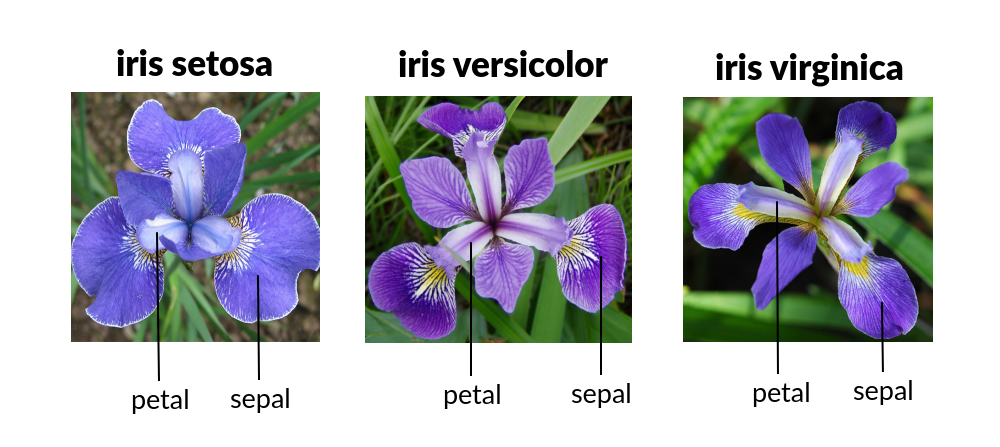

(Picture from https://morioh.com/p/eafb28ccf4e3)

Since we're currently looking at **binary** classification, we'll pick a positive class, let's say *virginica*, and the rest are the negative class. This is an example of data **preprocessing**.

In [99]:
positive_class = 'virginica'
y.loc[y != positive_class] = 'not-'+positive_class
y

0      not-virginica
1      not-virginica
2      not-virginica
3      not-virginica
4      not-virginica
           ...      
145        virginica
146        virginica
147        virginica
148        virginica
149        virginica
Name: target, Length: 150, dtype: object

Now we're ready to **split into training and test data**. We'll use the sklearn training/test split function which also handles Pandas data structures. We're also setting the test_size to 0.9 to make this dataset a bit harder to learn, by leaving only 10% for the training set.

In [100]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.9)

# and show the result
df = X_train.join(y_train)  # X is feature and y is label(target)
df.head(20)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
88,5.6,3.0,4.1,1.3,not-virginica
47,4.6,3.2,1.4,0.2,not-virginica
147,6.5,3.0,5.2,2.0,virginica
81,5.5,2.4,3.7,1.0,not-virginica
9,4.9,3.1,1.5,0.1,not-virginica
43,5.0,3.5,1.6,0.6,not-virginica
30,4.8,3.1,1.6,0.2,not-virginica
62,6.0,2.2,4.0,1.0,not-virginica
42,4.4,3.2,1.3,0.2,not-virginica
85,6.0,3.4,4.5,1.6,not-virginica


Now we're going to **initialize a model**. Many models have numeric parameters or even choices of sub-algorithms that determine how they're doing. For example, a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) has a *kernel* and this can be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. The default is 'rbf' so these two lines are equivalent:

In [101]:
clf = sklearn.svm.SVC()
clf = sklearn.svm.SVC(kernel='rbf')

Then we go and **fit the model** with the training *features* and *labels*:

In [102]:
clf.fit(X_train, y_train)
pass

Then we **make a prediction** on the test data:

In [103]:
y_pred = clf.predict(X_test)
y_pred

array(['not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', 'not-virginica', 'not-virginica', 'not-virginica',
       'not-virginica', '

And now we can **compare** the prediction to the true values:

In [104]:
print(accuracy(y_test, y_pred, positive_class))  # our implementation
print(sklearn.metrics.accuracy_score(y_test, y_pred))  # sklearn implementation


0.6370370370370371
0.6370370370370371


The score we're getting isn't great, and that's because we artifically made our training set really small. 10% of 150 instances means just 15 samples - actually maybe that score isn't so bad then. Let's gather all the code in one cell so you can more easily tweak it:

In [105]:
# Load an example dataset from sklearn
data = sklearn.datasets.load_iris()

# Split into features...
X = pd.DataFrame(data=data.data, columns=data.feature_names)

# And target labels
y = pd.Series(['placeholder']*len(data.target), name='target')
for i, name in enumerate(data.target_names):
    y[data.target == i] = name

# Turn it into binary classification
positive_class = 'virginica'
y.loc[y != positive_class] = 'not-'+positive_class

# Split into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.9, stratify=y, random_state=42
)

# Initialize and fit
clf = sklearn.svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate the quality of the prediction
print(f'True Positives {true_positives(y_test, y_pred, positive_class)}'.rjust(22))
print(f'False Positives {false_positives(y_test, y_pred, positive_class)}'.rjust(22))
print(f'True Negatives {true_negatives(y_test, y_pred, positive_class)}'.rjust(22))
print(f'False Negatives {false_negatives(y_test, y_pred, positive_class)}'.rjust(22))
print(f'Precision {precision(y_test, y_pred, positive_class):.2f}'.rjust(25))
print(f'Recall {recall(y_test, y_pred, positive_class):.2f}'.rjust(25))
print(f'Specificity {specificity(y_test, y_pred, positive_class):.2f}'.rjust(25))
print(f'Accuracy {accuracy(y_test, y_pred, positive_class):.2f}'.rjust(25))
print(f'Balanced Accuracy {balanced_accuracy(y_test, y_pred, positive_class):.2f}'.rjust(25))
print(f'F1 {F1(y_test, y_pred, positive_class):.2f}'.rjust(25))

# for random seed =42: 
# outcome when srtatify = None, kernal is linear: 
#     True Positives 43
#      False Positives 4
#      True Negatives 88
#      False Negatives 0
#            Precision 0.91
#               Recall 1.00
#          Specificity 0.96
#             Accuracy 0.97
# TPR: 1.0
# TNR: 0.9565217391304348
#    Balanced Accuracy 0.98
#                   F1 0.96

# outcome when srtatify = None, kernal is poly: 

#      True Positives 43
#      False Positives 3
#      True Negatives 89
#      False Negatives 0
#            Precision 0.93
#               Recall 1.00
#          Specificity 0.97
#             Accuracy 0.98
# TPR: 1.0
# TNR: 0.967391304347826
#    Balanced Accuracy 0.98
#                   F1 0.97

# outcome when srtatify = None, kernal is rbf: 
#      True Positives 43
#      False Positives 5
#      True Negatives 87
#      False Negatives 0
#            Precision 0.90
#               Recall 1.00
#          Specificity 0.95
#             Accuracy 0.96
# TPR: 1.0
# TNR: 0.9456521739130435
#    Balanced Accuracy 0.97
#                   F1 0.95

# wehn startify is None,  poly kernal works best

# Outcome when stratify = y, kernal is linear 
#      True Positives 43
#      False Positives 4
#      True Negatives 86
#      False Negatives 2
#            Precision 0.91
#               Recall 0.96
#          Specificity 0.96
#             Accuracy 0.96
# TPR: 0.9555555555555556
# TNR: 0.9555555555555556
#    Balanced Accuracy 0.96
#                   F1 0.93


#Outcome when stratify = y, kernal is poly
#      True Positives 44
#      False Positives 0
#      True Negatives 90
#      False Negatives 1
#            Precision 1.00
#               Recall 0.98
#          Specificity 1.00
#             Accuracy 0.99
# TPR: 0.9777777777777777
# TNR: 1.0
#    Balanced Accuracy 0.99
#                   F1 0.99

# outcome when srtatify = y, kernal is rbf: 
#      True Positives 36
#      False Positives 5
#      True Negatives 85
#      False Negatives 9
#            Precision 0.88
#               Recall 0.80
#          Specificity 0.94
#             Accuracy 0.90
# TPR: 0.8
# TNR: 0.9444444444444444
#    Balanced Accuracy 0.87
#                   F1 0.84


     True Positives 44
     False Positives 0
     True Negatives 90
     False Negatives 1
           Precision 1.00
              Recall 0.98
         Specificity 1.00
            Accuracy 0.99
TPR: 0.9777777777777777
TNR: 1.0
   Balanced Accuracy 0.99
                  F1 0.99


Try running the cell above a couple of times. Play with this model a bit and try out things like:

* You can change `stratify=None` to `stratify=y`. This will tell sklearn to make sure that when splitting `X` and `y` into training and test set, the proportion between the classes in `y` is preserved when splitting the data. So if there are 33% instances of the positive class in the original dataset, there'll also be 33% in the training set and in the test set. Does this make the predictions better?
* Try other kernels (poly, linear). Is `rbf` really the best kernel for this problem?
* Try out "setosa" and "versicolor" as the positive class. Does it seem like one of them is easier?

#### Open questions
You've probably noticed that you don't get the same results each time. This of course makes it hard find the best configuration for your model.

##### **Question 1** Name one way you could improve the experiment and why it would help

##### **Question 2** Name another way you could improve the experiment and why it would help

##### **Question 3** Name a third way you could improve the experiment and why it would help

## Using an ROC curve
Most classification models use a "discrimination value" somewhere. They compute a probability of the instance belonging to a class, and if that probability is high enough, they predict it to be in that class. In binary classification for example, you could say that if you're 50% sure that something belongs to class A, you predict it to be class A, and otherwise you say it's B.

Putting the discrimination threshold at 50% makes sense if the cost of a false positive is the same as the cost of a false negative. But this is not always the case - actually it's rarely the case. Usually, one is more important than the other, depending on what kind of problem you're solving. For example, if you're screening people for a serious disease, a false positive means someone has to do some extra medical tests and maybe some emotional distress. But a false negative means someone might not get treatment in time and die. And the opposite can be the case too: if you're classifying emails as spam and not-spam, the cost of a false negative isn't very serious (someone gets some spam in their inbox). But a false positive can mean an important mail ends in the spam folder and goes unseen.

So we want a more advanced method of balancing how our model handles this decision.

The "receiver operating characteristic" curve gives us a visual idea of how changing the discrimination threshold in a model will affect the results. It shows the balance between true positive rate and false positive rate. In other words, how many more false positives does it take to get how many more true positives?

### Let's get some data
We'll use the "digits" dataset that comes packages with sklearn. It represents 8x8 pixel images of handwritten digits.

In [34]:
data = sklearn.datasets.load_digits()  # this is a sample dataset from sklearn with digits 0..9
print(type(data))  # what kind of datatype is this?
print(dir(data))  # let's see how it's structured, using `dir()` to peek inside an object

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


As you can see it's a new data format, a "Bunch". Let's briefly take a look at the inner structure:

In [35]:
print(type(data.DESCR))
print(type(data.data))
print(type(data.images))
print(type(data.target))
print(type(data.target_names))

<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Okay, so the Bunch datatype is apparently literally a bunch of arrays and a description string. Well with arrays the interesting thing of course is what shape they have:

In [36]:
print('data', data.data.shape)
print('images', data.images.shape)
print('target', data.target.shape)
print('target_names', data.target_names.shape)

data (1797, 64)
images (1797, 8, 8)
target (1797,)
target_names (10,)


So, the data, images and target all have the same number of instances (1797). The data is formated as a 64-cell rows, while the images are 8x8 matrices. Looks like the data field is probably the images flattened out into a line, because 8x8=64. Meanwhile for each instance there should be only one target value, and therefore the targets are a single-dimension array.

The target_names array contains only 10 entries, and of course our dataset is about recognizing handwritten digits.

Let's take a look at the first instance of each of these arrays:

data.data =
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


data.images =
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

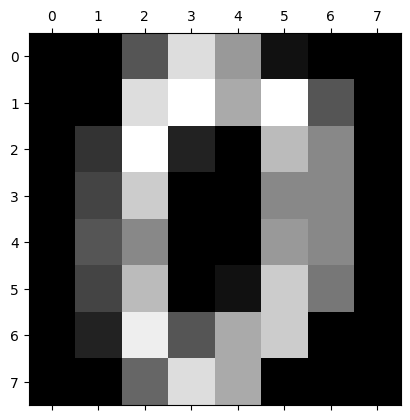



data.target = 0


In [37]:
print('data.data =')
print(data.data[0])

print('\n\ndata.images =')
print(data.images[0])


plt.gray() 
plt.matshow(data.images[0]) 
plt.show()

print('\n\ndata.target =', data.target[0])


In [38]:
print(np.unique(data.target))  # what are the unique labels in all the target instances?
print(data.target_names)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Okay, so in this particular case, the targets (0..9) happen to be the same as the target_names (0..9). This isn't always the case - often the targets are encoded as numbers while the target_names are text strings. But right now it's convenient.

We finish up by taking from the data what we want:

In [39]:
X = data.data
y = data.target

### Turn it into binary classification
We want to make this a binary classification problem, so we'll transform the target labels. Let's say that we're distinguishing between "nine" and "not nine".

In [40]:
y[y != 9] = 0
y[y == 9] = 1
print(np.unique(y))

[0 1]


### Create train and test sets
We'll use the sklearn `train_test_split` function again.

In [41]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

### Collect all the dataset preprocessing into one cell
It can be handy to re-generate your datasets with one press of a button, especially if you have to be careful to to it in a particular order, or if the results change when you repeat one step.

Because we're also experimenting with some pretty powerful models (compared to this simple toy dataset), we'll parameterize how much of the dataset we use as training set. That way, we can make the learning problem harder by giving the models less data to train on.

We use here `sklearn.model_selection.train_test_split`, which was the model for the function you had to implement earlier, but it has some extra functionality. One of those is the `stratify` keyword, that ensures that the proportion of each class in `y_test` and `y_train` is the same as it was in `y`. This is useful in our case because we have very imbalanced classes; otherwise we might get a training set with almost no nines in it, and learn a very poor model.

In [42]:

def load_data(fraction=0.75, seed=None, target_digit=9, appply_stratification=True):
    data = sklearn.datasets.load_digits()
    X = data.data
    y = data.target
    y[y != target_digit] = 11  # we have to do this swap because 1 and 0 also occur as labels in our dataset
    y[y == target_digit] = 12
    y[y == 11] = 0  # negative class
    y[y == 12] = 1  # positive class
    if appply_stratification:
        stratify = y
    else:
        stratify = None
    return sklearn.model_selection.train_test_split(X, y, train_size=fraction, random_state=seed, stratify=stratify)

### Applying a Support Vector Classifier

In [43]:
X_train, X_test, y_train, y_test = load_data(target_digit=9)

# Initialize and fit the model
svc = sklearn.svm.SVC()
svc.fit(X_train, y_train)

# Make predictions
X_train, X_test, y_train, y_test = load_data(fraction=0.75)
y_pred_svc = svc.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred_svc, target_names=['not nine', 'nine']))
pd.crosstab(y_test, y_pred_svc, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True)


              precision    recall  f1-score   support

    not nine       0.99      1.00      1.00       405
        nine       0.98      0.93      0.95        45

    accuracy                           0.99       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.99      0.99      0.99       450



PREDICTED,0,1,All
ACTUAL,,,
0,404,1,405
1,3,42,45
All,407,43,450


Here we used the `sklearn.metrics.classification_report` function to get this convenient overview, but the results should be the same as in the functions you developed earlier. The *support* value indicates how many instances of this class are actually in the data. You can see that the *nine* class has lower support, and as we might expect, worse recall than the *not nine* class.

In [44]:
# Our own version of the measures that we implemented above should give the same results
print(f'precision {precision(y_test, y_pred_svc, positive_class=1):.2f}')
print(f'recall {recall(y_test, y_pred_svc, positive_class=1):.2f}')
print(f'accuracy {accuracy(y_test, y_pred_svc, positive_class=1):.2f}')
print(f'specificity {specificity(y_test, y_pred_svc, positive_class=1):.2f}')
print(f'balanced_accuracy {balanced_accuracy(y_test, y_pred_svc, positive_class=1):.2f}')
print(f'F1 {F1(y_test, y_pred_svc, positive_class=1):.2f}')

precision 0.98
recall 0.93
accuracy 0.99
specificity 1.00
TPR: 0.9333333333333333
TNR: 0.9975308641975309
balanced_accuracy 0.97
F1 0.95


### Appling a Random Forest model

In [45]:
# Initialize and fit the model
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# Make predictions
X_train, X_test, y_train, y_test = load_data(fraction=0.75)
y_pred_rf = rf.predict(X_test)

# Evaluate them
print(sklearn.metrics.classification_report(y_test, y_pred_rf, target_names=['False', 'True']))
pd.crosstab(y_test, y_pred_rf, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True)

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       405
        True       1.00      0.93      0.97        45

    accuracy                           0.99       450
   macro avg       1.00      0.97      0.98       450
weighted avg       0.99      0.99      0.99       450



PREDICTED,0,1,All
ACTUAL,,,
0,405,0,405
1,3,42,45
All,408,42,450


### Construct the ROC curves
Here we run a script to generate the ROC curve for the two classifiers, to examine how they respond to bigger and smaller training sets. We use the `fraction` parameter of our `load_data` function to observe the effect of using 80% and 10% of the dataset.

There are two "magical" things here that are useful to understand. There is the `decision_function` in line 10, and the `predict_proba` function in line 16. What these functions do is give you the probabability of a given instance being in class 1 or 0. Then, depending on some discrimination threshold that we set, we predict the class 1 or 0. For example, if we set our threshold at 0.5, then any instance that our model thinks has a probability > 0.5 to be in class 1, will be predicted to be class 1. So the difference between these two functions and the `predict` function we used earlier is that these functions give us the raw, pre-decision class probability estimates for our instances.

You might put the decision threshold at 0.5, which means you classify an instance as class 1 if you're more than 50% sure that it's in class 1. But it can be useful to set the threshold at a different value. For example, imagine we're screening people for disease. If we have a false positive, someone may be flagged as "at risk" and have to do some more diagnostic tests. Inconvenient and maybe a bit stressful, and there are some lab work costs. But if we get a false negative, someone might remain undiagnosed, which can be life-threatening and is much more costly. So in this case, we might set our threshold lower. We'll have more false positives but fewer false negatives.

With the ROC curve, we show this trade-off between how many false positives we have to "pay" to gain more true positives, based on how we set the discrimination threshold.

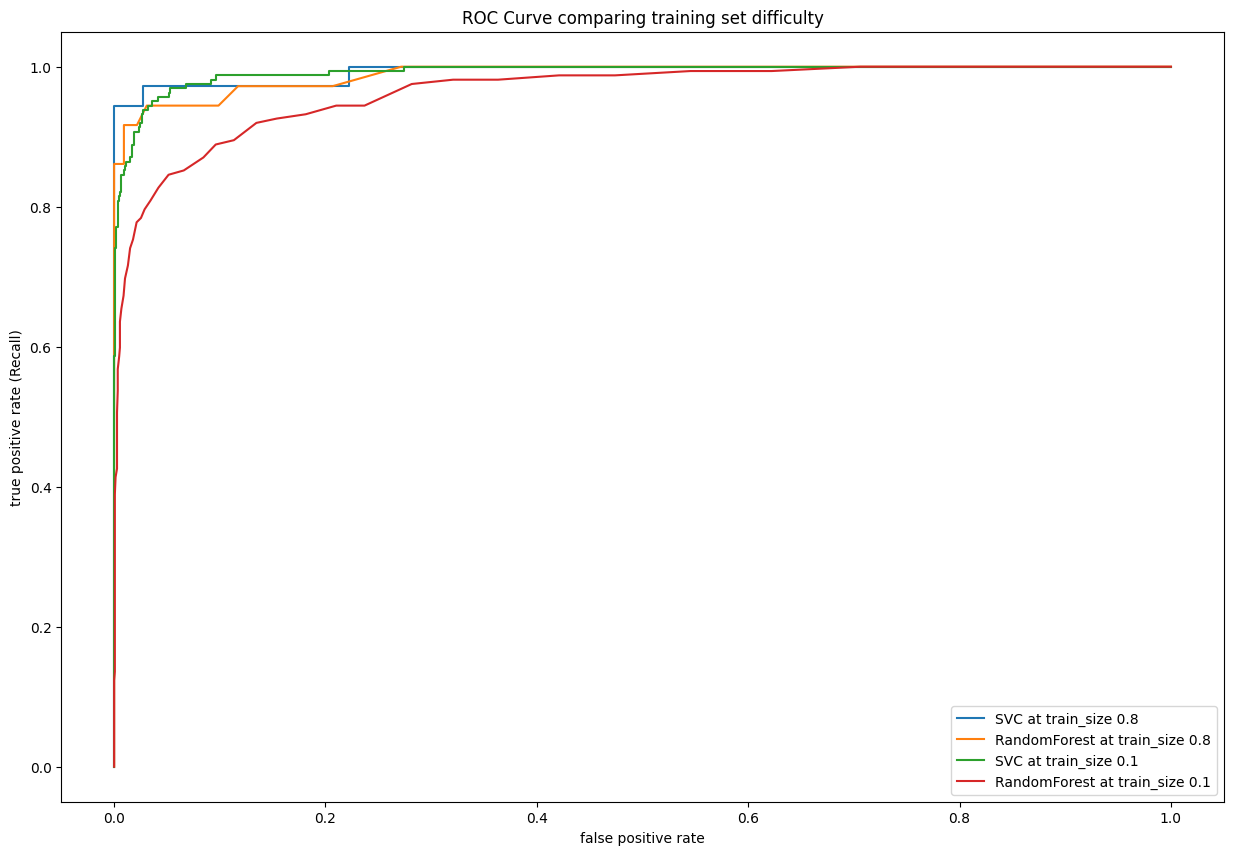

In [46]:
# Initialize plot with desired size
plt.figure(figsize=(15,10))

for train_size in [0.8, 0.1]:
    X_train, X_test, y_train, y_test = load_data(fraction=train_size)

    # Support Vector Classifier
    svc = sklearn.svm.SVC()
    svc.fit(X_train, y_train)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, svc.decision_function(X_test))
    plt.plot(fpr, tpr, label=f'SVC at train_size {train_size}')

    # Random Forest
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
    rf.fit(X_train, y_train)
    fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
    plt.plot(fpr_rf, tpr_rf, label=f'RandomForest at train_size {train_size}')


# Plot layout
plt.title('ROC Curve comparing training set difficulty')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (Recall)')
plt.legend()
plt.show()

You can find more theory about ROC curves in chapter 2.3 of the handbook.

#### Open Questions

##### **Question 4** If you had only a small dataset, which model would you prefer random forest or svc? Why? Refer to your graph in the answer.

##### **Question 5** If you re-run the cell, the plot changes. Why is this? What can you do to prevent that? Is that a good idea?

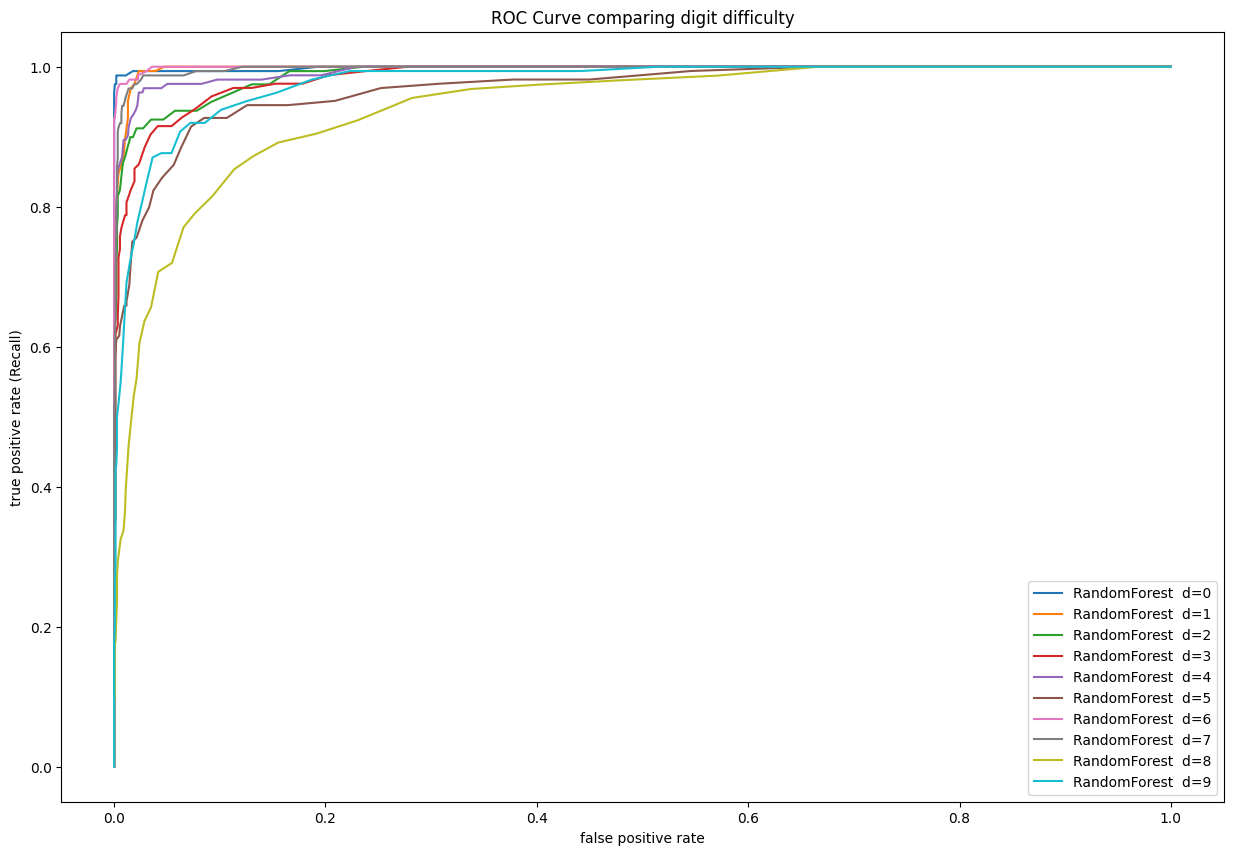

In [47]:
# Initialize plot with desired size
plt.figure(figsize=(15,10))

for digit in range(0, 10):
    X_train, X_test, y_train, y_test = load_data(fraction=0.1, target_digit=digit)

#     # Support Vector Classifier
#     svc = sklearn.svm.SVC()
#     svc.fit(X_train, y_train)
#     fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, svc.decision_function(X_test))
#     plt.plot(fpr, tpr, label=f'SVC for d={digit}')

    # Random Forest
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
    rf.fit(X_train, y_train)
    fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
    plt.plot(fpr_rf, tpr_rf, label=f'RandomForest  d={digit}')


# Plot layout
plt.title('ROC Curve comparing digit difficulty')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (Recall)')
plt.legend()
plt.show()

The code above used `sklearn.metrics.roc_curve`, but to get the AUC you can use `sklearn.metric.auc_roc_score` which uses the same arguments. Write code to express for each digit how large the AUC is, using the SVC and RandomForest classifiers.

In [48]:
auc_svc = []
auc_rf = []
for digit in range(0, 10):
    X_train, X_test, y_train, y_test = load_data(fraction=0.1, target_digit=digit, seed=None)

    # Support Vector Classifier
    svc = sklearn.svm.SVC()
    svc.fit(X_train, y_train)
    auc_svc.append(sklearn.metrics.roc_auc_score(y_test, svc.decision_function(X_test)))

    # Random Forest
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
    rf.fit(X_train, y_train)
    auc_rf.append(sklearn.metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
results = pd.DataFrame(data={'AUC SVC': auc_svc, 'AUC RandomForest': auc_rf}, index=range(10))
results

,AUC SVC,AUC RandomForest
0,0.999966,0.999513
1,0.995605,0.998503
2,0.999991,0.997114
3,0.992517,0.980421
4,0.999928,0.999376
5,0.998180,0.996716
6,0.999266,0.998431
7,0.999493,0.998438
8,0.976340,0.952755
9,0.987985,0.971601


#### Open Questions

##### **Question 6** Which seems to be the hardest class (digit) to learn for SVM, and for RandomForest? How can you tell?

##### **Question 7** Why do you think that class is harder?

## Choosing a model
Consider the ROC curve generated by this code:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.715
Random Forest: ROC AUC=0.549


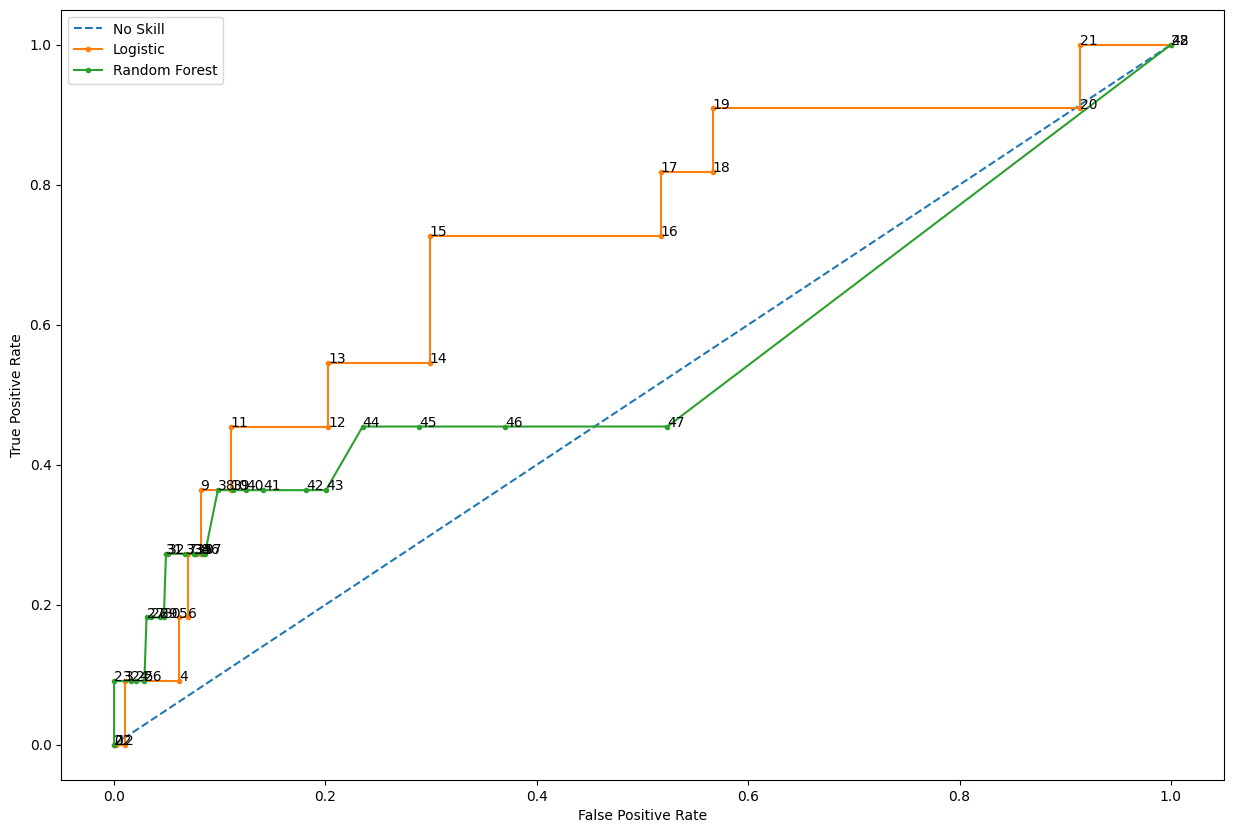

In [49]:
# Initialize plot with desired size
plt.figure(figsize=(15,10))

# generate 2 class dataset with heavy class imbalance
X, y = sklearn.datasets.make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_test))]  # always predict 0, regardless of the features

# fit a logistic model
logistic = sklearn.linear_model.LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train)

# fit a random forest
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500, random_state=0, max_features=5)
rf.fit(X_train, y_train)

# predict probabilities
lr_probs = logistic.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
no_skill_auc = sklearn.metrics.roc_auc_score(y_test, no_skill_probs)
lr_auc = sklearn.metrics.roc_auc_score(y_test, lr_probs)
rf_auc = sklearn.metrics.roc_auc_score(y_test, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (no_skill_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = sklearn.metrics.roc_curve(y_test, no_skill_probs)
lr_fpr, lr_tpr, _ = sklearn.metrics.roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = sklearn.metrics.roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label=f'No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
for i, xy in enumerate(zip(lr_fpr, lr_tpr)):
    plt.annotate(f'{i}', xy=xy)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
for j, xy in enumerate(zip(rf_fpr, rf_tpr)):
    plt.annotate(f'{i+j}', xy=xy)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Open Questions

##### **Question 8** Which point is preferable, 14 or 15? Why?

##### **Question 9** Which point is preferable, 15 or 16? Why?

##### **Question 10** Give an example of a ML task where you would prefer the random forest over the logistic model. Refer to your graph in the answer.

##### **Question 11** Give an example of a ML task where you would prefer the logistic model over the random forest. Refer to your graph in the answer.

##### **Question 12** What does it mean that point 47 of the random forest is below the (0,0) to (1,1) diagonal?